In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import datasets
train = pd.read_csv("C:/Users/yutin/Desktop/Python_DS/kaggle/titanic/train.csv")
test = pd.read_csv("C:/Users/yutin/Desktop/Python_DS/kaggle/titanic/test.csv")

In [2]:
#feature information
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
train.info()
#Cabin has a lot missing 
#age also has missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.describe(percentiles=[0.00,0.25,0.5,0.75,1.00])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
100%,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#feature analysis
#understanding the relationsip between features
#prepareing for the modeling
#survival counts
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
#check the correlation over all
train_corr = train.drop('PassengerId',axis = 1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


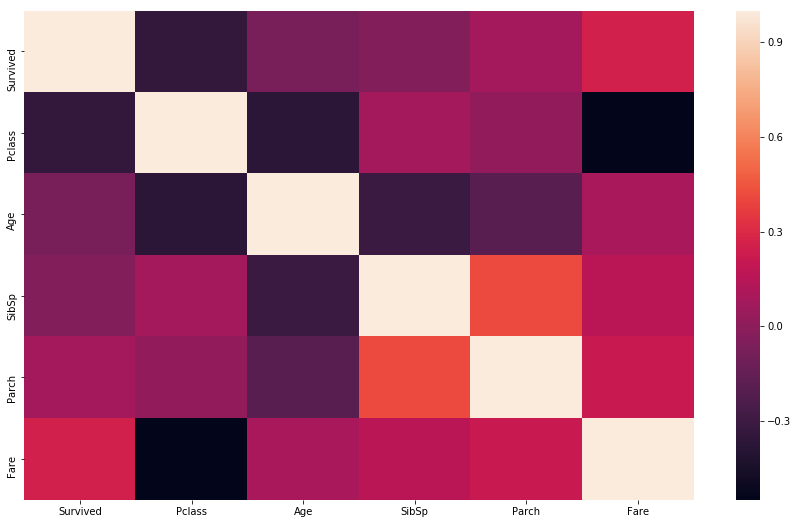

In [6]:
#get the heatmap
a = plt.subplots(figsize=(15,9))#resize the figure
a = sns.heatmap(train_corr)
#a strong negative relationship between Pclass and Survived
#object-based feature missing here
#further work needed

In [7]:
#sex
train.groupby(['Sex'])['Sex','Survived'].mean()
#women have more chance to survive

,Survived
Sex,
female,0.742038
male,0.188908


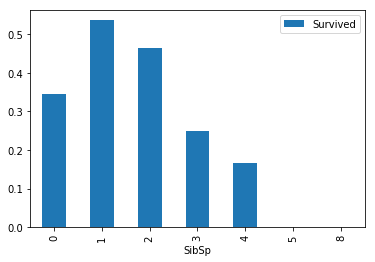

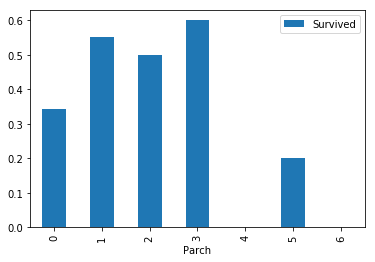

In [8]:
#SibSp and Parch
#use the sqaure brackets for feature
#common feature #1
#groupby, mean and plot.bar()
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

C:\Users\yutin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


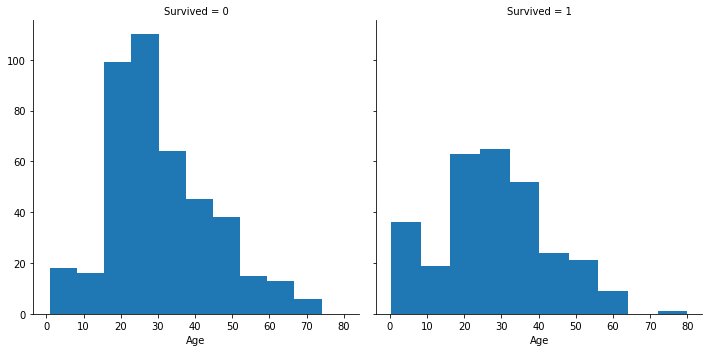

In [9]:
#age
g = sns.FacetGrid(train, col = 'Survived', size = 5)#the Grid, col = 'Survived' has two cols
g.map(plt.hist,'Age',bins=10)
#use map to map histogram on the grids
#common feature #2
#g = sns.FacetGrid(data, col,size) col can be considered as conditions
#g.map(plt.hist,row,bins) col of the graph is counts

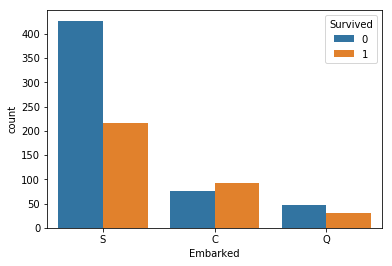

In [10]:
#embarked
# train[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
#common feature #3
#sns.countplot(row,hue,data)
#signle quatation replace square brackets
sns.countplot('Embarked',hue='Survived',data=train)

part2 feature engineering


In [11]:
#feature engineering
#combine train and test data sets for manuplating
test['Survived'] = 0
train_test = train.append(test)

C:\Users\yutin\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
train_test.columns


Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'SibSp', 'Survived', 'Ticket', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [13]:
#pclass
train_test = pd.get_dummies(train_test,columns=['Pclass'])
#sex
train_test = pd.get_dummies(train_test,columns=['Sex'])

In [16]:
#Sibsp and Parch
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']
train_test = pd.get_dummies(train_test,columns=['SibSp_Parch'])

In [17]:
#embarked
train_test = pd.get_dummies(train_test,columns=["Embarked"])

In [23]:
#name
# train_test['Title'] = train_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
import re
train_test['Title'] = train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [24]:
train_test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Title'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Title'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Title'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Title'].replace(['Master'], 'Master' , inplace = True)

In [25]:
train_test = pd.get_dummies(train_test,columns=['Title'])

In [26]:
#extra last name as feature
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])
#take counts on last name
Name2_sum = train_test['Name2'].value_counts().reset_index()
Name2_sum.columns=['Name2','Name2_sum']
#merge the data frame
train_test = pd.merge(train_test,Name2_sum,how='left',on='Name2')
#assign one to those last_name appearing once
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
del train_test['Name2']
train_test = pd.get_dummies(train_test,columns=['Name2_new'])

In [27]:
del train_test['Name']

In [28]:
#fare has one missing
# train_test.loc[train_test["Fare"].isnull()]
train.groupby(by=["Pclass","Embarked"]).Fare.mean()
#pclass = 3, embarked = S
train_test["Fare"].fillna(14.644083,inplace=True)

In [29]:
#tickets
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [30]:
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

In [31]:
#age
#missing data issue
#create a new feature-age_missing
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

In [34]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 174 entries, Age to age_nan_1.0
dtypes: float64(2), int64(5), object(1), uint8(166)
memory usage: 344.2+ KB


In [32]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [33]:
#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [35]:
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

C:\Users\yutin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yutin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\yutin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [40]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()

In [42]:
lin.fit(missing_age_X_train,missing_age_Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [43]:
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [44]:
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])

train_test = pd.get_dummies(train_test,columns=['Age'])

In [45]:
#划分数据集
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

models